<a href="https://colab.research.google.com/github/benderminguez89/ArtificialIntelligence/blob/main/AI_FinalProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARIES + LOAD DATASET

In [417]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, normalize
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

import tensorflow as tf
from keras import models, layers, optimizers, regularizers

names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                 'marital-status', 'occupation', 'relationship', 'race', 'sex', 
                 'capital-gain', 'capital-loss', 'hours-per-week', 
                 'native-country', 'income']

# Load data from URL
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
data = pd.read_csv(url, header=None, names=names, na_values=['?', ' ?'])

# EXPLORATORY DATA ANALYSIS

In [418]:
print(f'Shape of overall DataFrame: {data.shape}\n\nNaN values:\n{data.isna().sum()}')

#dropping all NaN data
non_NaN_df = data.dropna()
print(f'\nShape of overall DataFrame: {non_NaN_df.shape}\n\nNaN values:\n{non_NaN_df.isna().sum()}')

# Split the non-NaN dataset into three sets of training, validation, and testing data
X_train, X_test, y_train, y_test = train_test_split(non_NaN_df.drop('income', axis=1), non_NaN_df['income'], test_size=0.2,  shuffle=True, random_state=42, stratify=non_NaN_df['income'])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.2, shuffle=True, random_state=42, stratify = y_train)

#original training, validation and testing datasets for updated preprocessing and feature engineering
orig_X_train, orig_y_train = X_train, y_train
orig_X_test, orig_y_test = X_test, y_test
orig_X_val, orig_y_val = X_val, y_val

pd.set_option('display.max_columns', None)
print(X_train)

pd.set_option('display.max_columns', None)

print(f'\n\nTraining set shape:\nfeatures->{X_train.shape}\n  target->{y_train.shape}')
print(f'\n\nInfo:\n{X_train.info()}\nDescribe:\n{X_train.describe()}\nCorrelations:\n{X_train.corr()}\n\n{y_train.value_counts()}')

Shape of overall DataFrame: (32561, 15)

NaN values:
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

Shape of overall DataFrame: (30162, 15)

NaN values:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64
       age      workclass  fnlwgt      education  education-num  \
8630    21        Private  117210   Some-college             10   
20942   44        Private  214415   Some-college             10   
9332    31        Pri

<ipython-input-418-e6feeaa8e620>:22: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(f'\n\nInfo:\n{X_train.info()}\nDescribe:\n{X_train.describe()}\nCorrelations:\n{X_train.corr()}\n\n{y_train.value_counts()}')


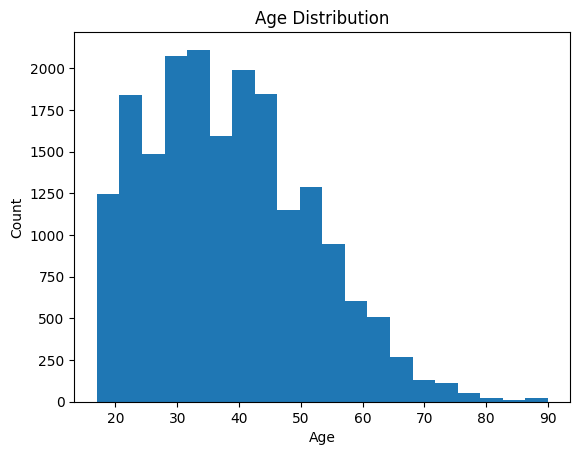

In [419]:
viz_df = X_train
viz_df['income'] = y_train


#bar chart of the age distribution
plt.hist(viz_df['age'], bins=20, )
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

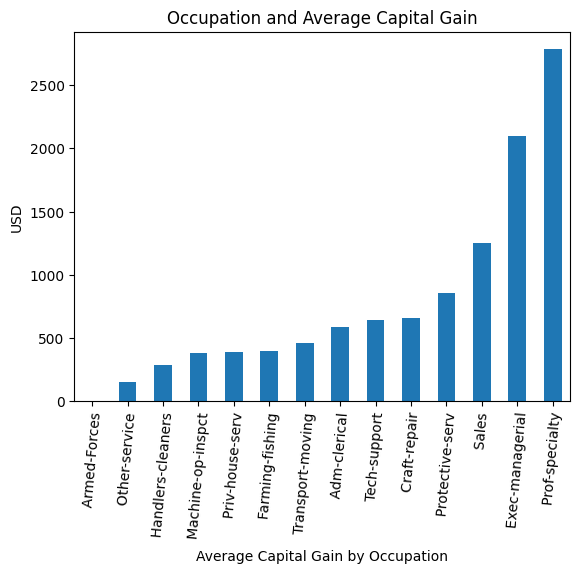

In [420]:
#bar chart of occupation and average capital gain
cap_gain = viz_df.groupby(['occupation'])['capital-gain'].mean().sort_values()
cap_gain.plot(kind='bar')
plt.xticks(rotation=85)
plt.xlabel('Average Capital Gain by Occupation')
plt.ylabel('USD')
plt.title('Occupation and Average Capital Gain')
plt.show()

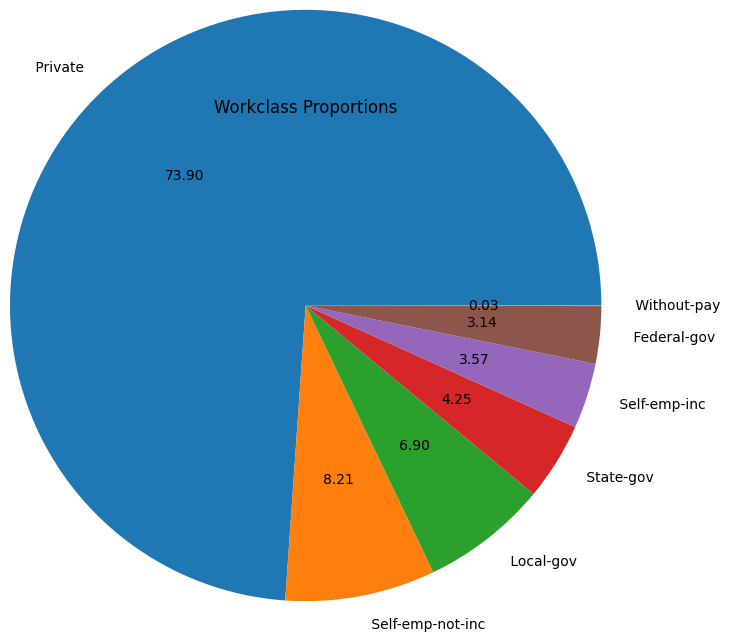

In [421]:
#pie chart of workclass proportions
workclass_counts = viz_df['workclass'].value_counts()
plt.pie(workclass_counts, labels=workclass_counts.index, autopct='%.2f', radius=2)
plt.title('Workclass Proportions')
plt.show()

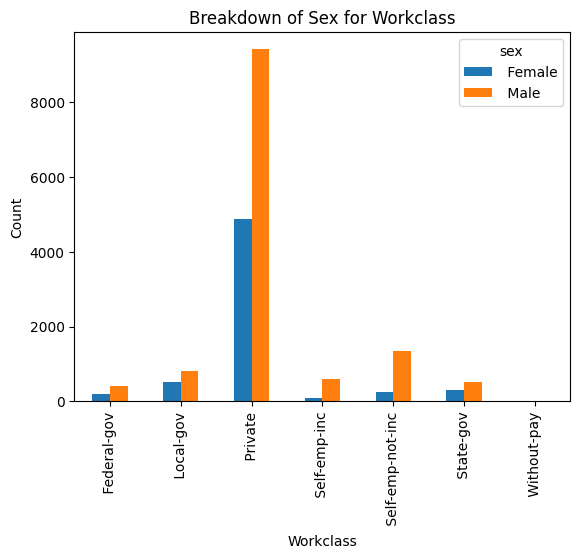

In [422]:
# Group the data by workclass and sex
grouped_data = viz_df.groupby(['workclass', 'sex']).size().unstack()

# Calculate the total number of individuals for each sex education level
total_counts = viz_df['workclass'].value_counts().sort_index()

# Normalize the grouped data by dividing each row by the corresponding total count
normalized_data = grouped_data.div(total_counts, axis=0)

# Group the data by sex and education level
grouped_data = viz_df.groupby(['workclass', 'sex']).size().unstack()

# Plot a stacked bar chart of the grouped data
grouped_data.plot(kind='bar')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.title('Breakdown of Sex for Workclass')
plt.show()

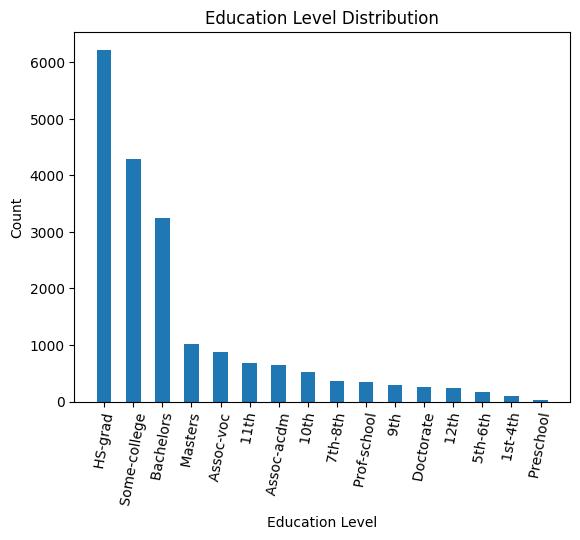

In [423]:
#bar chart of education level
edu_counts = viz_df['education'].value_counts()
plt.bar(edu_counts.index, edu_counts.values, width= 0.5)
plt.xticks(rotation=80)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level Distribution')
plt.show()

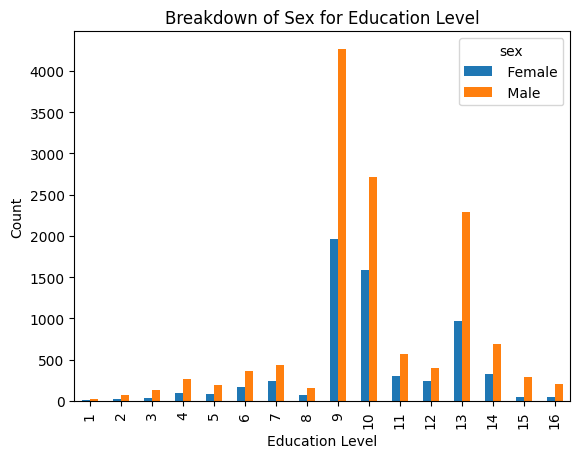

In [424]:
# Group the data by education level and income level
grouped_data = viz_df.groupby(['education-num', 'income']).size().unstack()

# Calculate the total number of individuals for each education level
total_counts = viz_df['education-num'].value_counts().sort_index()

# Normalize the grouped data by dividing each row by the corresponding total count
normalized_data = grouped_data.div(total_counts, axis=0)

# Group the data by sex and education level
grouped_data = viz_df.groupby(['education-num', 'sex']).size().unstack()

# Plot a bar chart of the grouped data
grouped_data.plot(kind='bar')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Breakdown of Sex for Education Level')
plt.show()

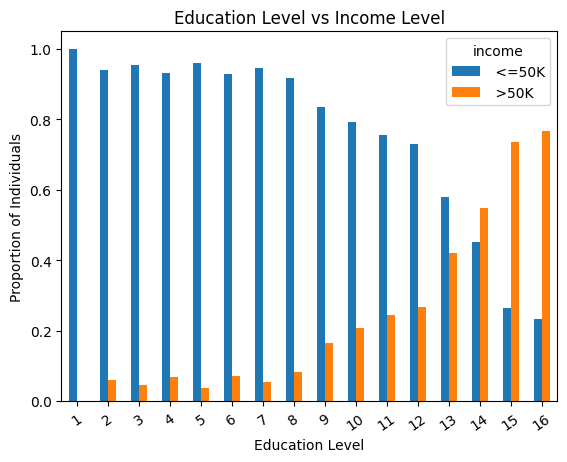

In [425]:
# Plot a bar chart of the normalized grouped data
normalized_data.plot(kind='bar')
plt.xticks(rotation=35)
plt.xlabel('Education Level')
plt.ylabel('Proportion of Individuals')
plt.title('Education Level vs Income Level')
plt.show()

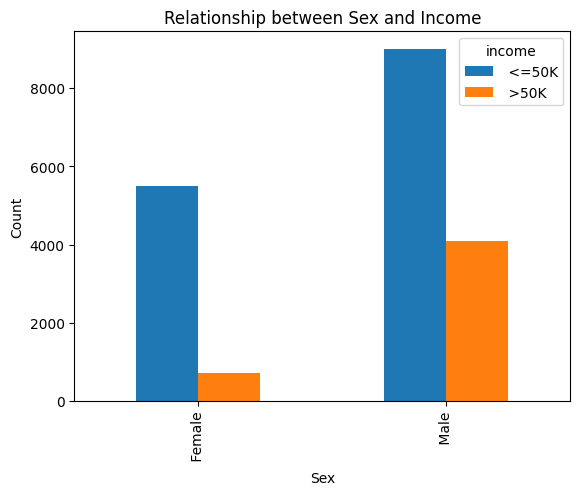

In [426]:
# Group the data by sex and income
grouped_data = viz_df.groupby(['sex', 'income']).size().unstack()

# Plot a stacked bar chart of the grouped data
grouped_data.plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Relationship between Sex and Income')
plt.show()

In [427]:
def preprocess(feature_df):
  ohe = OneHotEncoder(sparse=False)
  oe = OrdinalEncoder()
  std = StandardScaler()
  mms = MinMaxScaler()

  feature_df.drop('fnlwgt', inplace=True, axis=1)

  ohe_attributes = ['workclass','marital-status','occupation','relationship','race','native-country']
  oe_attributes = ['education','sex']
  std_attributes = ['capital-gain', 'capital-loss']
  mms_attributes = ['age']
  pass_through = ['education-num','hours-per-week']

  edu_levels = []
  for level in range(len(pd.unique(viz_df['education']))):
    edu_levels.append(level + 1 )

  preprocessing = ColumnTransformer([('passthrough', 'passthrough', pass_through),('OHE',ohe, ohe_attributes),('OE',oe, oe_attributes), ('minMax', mms, mms_attributes),('std', StandardScaler(), std_attributes)])
  
  pprocessed = preprocessing.fit_transform(feature_df)

  df_preprocessed = pd.DataFrame(pprocessed)

  cols = len(df_preprocessed.columns)
  i = 1
  if cols < 88:
    while cols < 88:
      df_preprocessed[cols] = 0
      cols += 1
      i += 1
  print(pprocessed)
  return df_preprocessed

def target_preprocess(target_df):
  df_preprocessed = pd.Categorical(target_df).codes

  return df_preprocessed

In [428]:
X_train_processed = preprocess(X_train)
y_train_processed = target_preprocess(y_train)
X_val_processed = preprocess(X_val)
y_val_processed = target_preprocess(y_val)

X_train_processed.head()

print(X_train_processed.value_counts())

[[10.         45.          0.         ...  0.05479452 -0.14570381
  -0.22006889]
 [10.         40.          0.         ...  0.36986301 -0.14570381
  -0.22006889]
 [ 5.         40.          0.         ...  0.19178082 -0.14570381
  -0.22006889]
 ...
 [ 6.         40.          0.         ...  0.16438356  0.5204638
  -0.22006889]
 [10.         35.          0.         ...  0.4109589  -0.14570381
  -0.22006889]
 [13.         40.          0.         ...  0.35616438  0.29614884
  -0.22006889]]
[[ 9.00000000e+00  4.00000000e+01  0.00000000e+00 ...  3.56164384e-01
  -1.50149139e-01 -2.27845301e-01]
 [ 1.00000000e+01  4.00000000e+01  0.00000000e+00 ...  4.10958904e-02
  -1.50149139e-01 -2.27845301e-01]
 [ 9.00000000e+00  5.00000000e+01  0.00000000e+00 ...  4.38356164e-01
  -1.50149139e-01 -2.27845301e-01]
 ...
 [ 1.20000000e+01  3.50000000e+01  0.00000000e+00 ...  5.47945205e-01
  -1.50149139e-01 -2.27845301e-01]
 [ 9.00000000e+00  4.00000000e+01  0.00000000e+00 ...  2.05479452e-01
  -1.50149139e

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# RULE-BASED APPROACH

In [429]:
# Define rule-based prediction function
def rule_based_predict(X):
    y_pred = []
    for i in range(X.shape[0]):
        row = X.iloc[i]
        if row["sex"] == "Female":
            if row["education"] in ["Bachelors", "Masters", "Doctorate"]:
                y_pred.append(1)
            elif row["education"] in ["Prof-school", "Assoc-acdm", "Assoc-voc"]:
                if row["age"] > 30:
                    y_pred.append(1)
                else:
                    y_pred.append(0)
            else:
                y_pred.append(0)
        else:
            if row["education"] in ["Bachelors", "Masters", "Doctorate"]:
                if row["age"] > 30:
                    y_pred.append(1)
                else:
                    y_pred.append(0)
            elif row["education"] in ["Prof-school", "Assoc-acdm", "Assoc-voc"]:
                y_pred.append(1)
            else:
                y_pred.append(0)
    return y_pred


# Evaluate model performance
y_pred = rule_based_predict(X_val)
accuracy = accuracy_score(y_val_processed, y_pred)
precision = precision_score(y_val_processed, y_pred)
recall = recall_score(y_val_processed, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.7511396601740572
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# LOGISTIC CLASSIFICATION

In [430]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)

log_reg.fit(X_train_processed, y_train_processed)

y_pred = log_reg.predict(X_train_processed)

cr = classification_report(y_pred, y_train_processed)
ac = accuracy_score(y_pred, y_train_processed)
pr = precision_score(y_pred, y_train_processed)
rc = recall_score(y_pred, y_train_processed)
print(f"Training Set Scoring before Tuning:\n{cr}")

print(f"Training Set Accuracy before Tuning: {ac}\nTraining Set Precision before Tuning: {pr}\nTraining Set Recall before Tuning: {rc}")

Training Set Scoring before Tuning:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90     15337
           1       0.61      0.73      0.66      3966

    accuracy                           0.85     19303
   macro avg       0.77      0.81      0.78     19303
weighted avg       0.86      0.85      0.85     19303

Training Set Accuracy before Tuning: 0.8475366523338341
Training Set Precision before Tuning: 0.6064516129032258
Training Set Recall before Tuning: 0.734745335350479


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# HYPER TUNING LOGISTIC REGRESSION

In [431]:
param_grid = {'C': [0.1, 0.5, 1, 3, 6, 10],
              'penalty': ['None', 'l1','l2']
             }

grid_search = GridSearchCV(log_reg, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_val_processed, y_val_processed)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Mean cross-validation score: {grid_search.best_score_}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best hyperparameters: {'C': 0.5, 'penalty': 'l2'}
Mean cross-validation score: 0.8528765594996728


# LOGREG VALIDATION

In [432]:
y_predicted = grid_search.predict(X_val_processed)


cr = classification_report(y_val_processed, y_predicted)
ac = accuracy_score(y_val_processed, y_predicted)
pr = precision_score(y_val_processed, y_predicted)
rc = recall_score(y_val_processed, y_predicted)

print(f"Validation Set Scoring after Tuning:\n{cr}")

print(f"Validation Set Accuracy before Tuning: {ac}\nValidation Set Precision before Tuning: {pr}\nValidation Set Recall before Tuning: {rc}")

Validation Set Scoring after Tuning:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      3625
           1       0.75      0.63      0.68      1201

    accuracy                           0.86      4826
   macro avg       0.82      0.78      0.80      4826
weighted avg       0.85      0.86      0.85      4826

Validation Set Accuracy before Tuning: 0.855781185246581
Validation Set Precision before Tuning: 0.7527527527527528
Validation Set Recall before Tuning: 0.6261448792672772


# DECISION TREE

In [433]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train_processed, y_train_processed)

#plt.figure(figsize=(20,10))
#plot_tree(clf, filled=True, feature_names=X_train.columns)
#plt.show()

y_prediction = clf.predict(X_train_processed)
ac = accuracy_score(y_prediction, y_train_processed)
pr = precision_score(y_prediction, y_train_processed)
rc = recall_score(y_prediction, y_train_processed)

cr = classification_report(y_prediction, y_train_processed)
print(f"Training Set Scoring before Tuning:\n{cr}")

print(f"Training Set Accuracy before Tuning: {ac}\nTraining Set Precision before Tuning: {pr}\nTraining Set Recall before Tuning: {rc}")

Training Set Scoring before Tuning:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     14781
           1       0.93      0.99      0.96      4522

    accuracy                           0.98     19303
   macro avg       0.96      0.98      0.97     19303
weighted avg       0.98      0.98      0.98     19303

Training Set Accuracy before Tuning: 0.9791224162047351
Training Set Precision before Tuning: 0.9286160249739854
Training Set Recall before Tuning: 0.9867315347191509


In [434]:
param_grid = {'max_depth': [2, 4, 6, 8, 10, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}


grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_val_processed, y_val_processed)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Mean cross-validation score: {grid_search.best_score_}")

Best hyperparameters: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean cross-validation score: 0.8518407191666935


In [435]:
y_predicted = grid_search.predict(X_val_processed)

cr = classification_report(y_val_processed, y_predicted)
ac = accuracy_score(y_val_processed, y_predicted)
pr = precision_score(y_val_processed, y_predicted)
rc = recall_score(y_val_processed, y_predicted)

print(f"Validation Set Scoring after Tuning:\n{cr}")

print(f"Validation Set Accuracy before Tuning: {ac}\nValidation Set Precision before Tuning: {pr}\nValidation Set Recall before Tuning: {rc}")

Validation Set Scoring after Tuning:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      3625
           1       0.81      0.65      0.72      1201

    accuracy                           0.87      4826
   macro avg       0.85      0.80      0.82      4826
weighted avg       0.87      0.87      0.87      4826

Validation Set Accuracy before Tuning: 0.8740157480314961
Validation Set Precision before Tuning: 0.8085327783558793
Validation Set Recall before Tuning: 0.6469608659450458


# DEEP LEARNING MODEL

# FEEDFORWARD NEURAL NETWORK

Epoch 1/10
194/194 [==============================] - 1s 3ms/step - loss: 0.4250 - accuracy: 0.8016
Epoch 2/10
194/194 [==============================] - 1s 3ms/step - loss: 0.3433 - accuracy: 0.8403
Epoch 3/10
194/194 [==============================] - 1s 3ms/step - loss: 0.3403 - accuracy: 0.8404
Epoch 4/10
194/194 [==============================] - 1s 3ms/step - loss: 0.3370 - accuracy: 0.8439
Epoch 5/10
194/194 [==============================] - 1s 3ms/step - loss: 0.3305 - accuracy: 0.8427
Epoch 6/10
194/194 [==============================] - 1s 3ms/step - loss: 0.3337 - accuracy: 0.8426
Epoch 7/10
194/194 [==============================] - 0s 3ms/step - loss: 0.3289 - accuracy: 0.8425
Epoch 8/10
194/194 [==============================] - 1s 3ms/step - loss: 0.3349 - accuracy: 0.8429
Epoch 9/10
194/194 [==============================] - 1s 3ms/step - loss: 0.3249 - accuracy: 0.8466
Epoch 10/10
151/151 [==============================] - 0s 2ms/step - loss: 1.9645 - accuracy: 0.7607

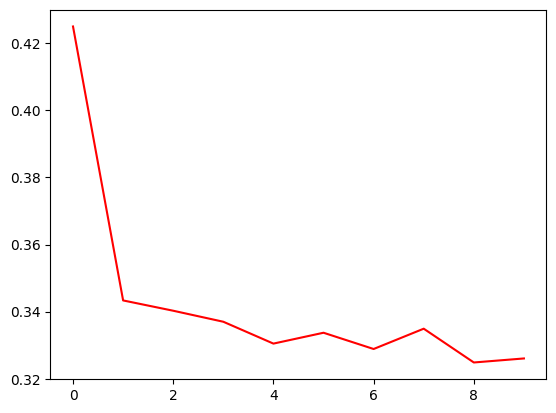

In [436]:
hidden_units = 88     # how many neurons in the hidden layer
activation = 'relu'   # activation function for hidden layer
l2 = 0.01             # regularization - how much we penalize large parameter values
learning_rate = 0.01  # how big our steps are in gradient descent
epochs = 5            # how many epochs to train for
batch_size = 100       # how many samples to use for each gradient descent update

# create a sequential model
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=88,
                       units=hidden_units, 
                       activation=activation))
# add the hidden layer
model.add(layers.Dense(input_dim=88,
                       units=hidden_units, 
                       activation=activation))
# add the hidden layer
model.add(layers.Dense(input_dim=88,
                       units=hidden_units, 
                       activation=activation))
# add the hidden layer
model.add(layers.Dense(input_dim=88,
                       units=hidden_units, 
                       activation=activation))

# add the output layer
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(learning_rate=learning_rate),
              metrics=['accuracy'])

# train the parameters
history = model.fit(X_train_processed, y_train_processed, epochs=10, batch_size=batch_size)

# evaluate accuracy


train_acc = model.evaluate(X_train_processed, y_train_processed, batch_size=32)[1]
test_acc = model.evaluate(X_val_processed, y_val_processed, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

In [437]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_train_OS, y_train_OS = sm.fit_resample(X_train_processed, y_train_processed)

In [438]:
print(f'{y_train_processed.shape}\n{y_train_OS.shape}')

(19303,)
(28996,)


In [439]:
log_reg.fit(X_train_OS, y_train_OS)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [440]:
y_pred = log_reg.predict(X_train_OS)

cr = classification_report(y_pred, y_train_OS)
ac = accuracy_score(y_pred, y_train_OS)
pr = precision_score(y_pred, y_train_OS)
rc = recall_score(y_pred, y_train_OS)
print(f"Training Set Scoring before Tuning:\n{cr}")

print(f"Training Set Accuracy before Tuning: {ac}\nTraining Set Precision before Tuning: {pr}\nTraining Set Recall before Tuning: {rc}")

Training Set Scoring before Tuning:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82     13605
           1       0.86      0.81      0.83     15391

    accuracy                           0.83     28996
   macro avg       0.83      0.83      0.83     28996
weighted avg       0.83      0.83      0.83     28996

Training Set Accuracy before Tuning: 0.8293212856945785
Training Set Precision before Tuning: 0.8601186370533866
Training Set Recall before Tuning: 0.8102137612890651


In [441]:
param_grid = {'C': [0.1, 0.5, 1, 3, 6, 10],
              'penalty': ['None', 'l1','l2']
             }

grid_search = GridSearchCV(log_reg, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_val_processed, y_val_processed)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Mean cross-validation score: {grid_search.best_score_}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best hyperparameters: {'C': 0.5, 'penalty': 'l2'}
Mean cross-validation score: 0.8528765594996728


In [442]:
y_predicted = grid_search.predict(X_val_processed)


cr = classification_report(y_val_processed, y_predicted)
ac = accuracy_score(y_val_processed, y_predicted)
pr = precision_score(y_val_processed, y_predicted)
rc = recall_score(y_val_processed, y_predicted)

print(f"Validation Set Scoring after Tuning:\n{cr}")

print(f"Validation Set Accuracy before Tuning: {ac}\nValidation Set Precision before Tuning: {pr}\nValidation Set Recall before Tuning: {rc}")

Validation Set Scoring after Tuning:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      3625
           1       0.75      0.63      0.68      1201

    accuracy                           0.86      4826
   macro avg       0.82      0.78      0.80      4826
weighted avg       0.85      0.86      0.85      4826

Validation Set Accuracy before Tuning: 0.855781185246581
Validation Set Precision before Tuning: 0.7527527527527528
Validation Set Recall before Tuning: 0.6261448792672772


In [443]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_OS, y_train_OS)

#plt.figure(figsize=(20,10))
#plot_tree(clf, filled=True, feature_names=X_train.columns)
#plt.show()

y_prediction = clf.predict(X_train_OS)
ac = accuracy_score(y_prediction, y_train_OS)
pr = precision_score(y_prediction, y_train_OS)
rc = recall_score(y_prediction, y_train_OS)

cr = classification_report(y_prediction, y_train_OS)
print(f"Training Set Scoring before Tuning:\n{cr}")

print(f"Training Set Accuracy before Tuning: {ac}\nTraining Set Precision before Tuning: {pr}\nTraining Set Recall before Tuning: {rc}")

Training Set Scoring before Tuning:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     14723
           1       0.98      0.99      0.99     14273

    accuracy                           0.99     28996
   macro avg       0.99      0.99      0.99     28996
weighted avg       0.99      0.99      0.99     28996

Training Set Accuracy before Tuning: 0.9854117809353015
Training Set Precision before Tuning: 0.9776520899434404
Training Set Recall before Tuning: 0.9930638268058573


In [444]:
param_grid = {'max_depth': [2, 4, 6, 8, 10, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}


grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_val_processed, y_val_processed)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Mean cross-validation score: {grid_search.best_score_}")

Best hyperparameters: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean cross-validation score: 0.8518407191666935


In [445]:
y_predicted = grid_search.predict(X_val_processed)

cr = classification_report(y_val_processed, y_predicted)
ac = accuracy_score(y_val_processed, y_predicted)
pr = precision_score(y_val_processed, y_predicted)
rc = recall_score(y_val_processed, y_predicted)

print(f"Validation Set Scoring after Tuning:\n{cr}")

print(f"Validation Set Accuracy before Tuning: {ac}\nValidation Set Precision before Tuning: {pr}\nValidation Set Recall before Tuning: {rc}")

Validation Set Scoring after Tuning:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      3625
           1       0.81      0.65      0.72      1201

    accuracy                           0.87      4826
   macro avg       0.85      0.80      0.82      4826
weighted avg       0.87      0.87      0.87      4826

Validation Set Accuracy before Tuning: 0.8740157480314961
Validation Set Precision before Tuning: 0.8085327783558793
Validation Set Recall before Tuning: 0.6469608659450458


In [446]:
def preprocess_w_names(feature_df):

  
  feature_df = feature_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)  # Remove whitespace from entries 

  # Combine similar education levels
  education_map = {'Preschool': 'below-high-school', 
                   '1st-4th': 'below-high-school', 
                   '5th-6th': 'below-high-school',
                   '7th-8th': 'below-high-school', 
                   '9th': 'below-high-school', 
                   '10th': 'high-school',
                   '11th': 'high-school', 
                   '12th': 'high-school', 
                   'HS-grad': 'high-school-grad',
                   'Some-college': 'some-college', 
                   'Assoc-voc': 'some-college', 
                   'Assoc-acdm': 'some-college',
                   'Bachelors': 'bachelors', 
                   'Masters': 'graduate-and-above', 
                   'Prof-school': 'graduate-and-above',
                   'Doctorate': 'graduate-and-above'
  }
  feature_df['education'] = feature_df['education'].replace(education_map)

  # Combine similar work-classes
  workclass_map = {'Federal-gov': 'gov_job',
                   'State-gov': 'gov_job',
                   'Local-gov': 'gov_job',
                   'Self-emp-inc': 'selfemp',
                   'Self-emp-not-inc': 'selfemp'
  }
  feature_df['workclass'] = feature_df['workclass'].replace(workclass_map)

  # Occupation mapping
  occupation_map = {' Adm-clerical': 'white-collar',
                     'Armed-Forces' : 'blue-collar', 
                    ' Craft-repair': 'blue-collar', 
                    ' Exec-managerial': 'white-collar', 
                    ' Farming-fishing': 'blue-collar', 
                    ' Handlers-cleaners': 'blue-collar', 
                    ' Machine-op-inspct': 'blue-collar', 
                    ' Other-service': 'blue-collar', 
                    ' Priv-house-serv': 'blue-collar', 
                    ' Prof-specialty': 'white-collar', 
                    ' Protective-serv': 'white-collar', 
                    ' Sales': 'white-collar', 
                    ' Tech-support': 'white-collar', 
                    ' Transport-moving': 'blue-collar'
  }
  
  feature_df['occupation'] = feature_df['occupation'].replace(occupation_map)

  # Relationship mapping
  relationship_map = {' Wife': 'spouse', 
                      ' Husband': 'spouse', 
                      ' Not-in-family': 'not-family', 
                      ' Own-child': 'family', 
                      ' Unmarried': 'not-family', 
                      ' Other-relative': 'family'
  }
  feature_df['relationship'] = feature_df['relationship'].replace(relationship_map)

  # Marital status mapping
  marital_status_map = {'Married-civ-spouse': 'married',
                        'Married-AF-spouse': 'married',
                        'Never-married': 'non-married',
                        'Divorced': 'non-married',
                        'Separated': 'non-married',
                        'Widowed': 'non-married'
  }
  feature_df['marital-status'] = feature_df['marital-status'].replace(marital_status_map)

  race_map = {'White':'White',
              'Black':'Black',
              'Asian-Pac-Islander':'Other',
              'Amer-Indian-Eskimo':'Other',
              'Other':'Other'
  }
  feature_df['race'] = feature_df['race'].replace(race_map)

  native_country_map = {'United-States': 'US',
                        'Mexico': 'Other',
                        'Philippines':'Other',
                        'Germany':'Other',
                        'Canada':'Other',
                        'Puerto-Rico':'Other',
                        'Cuba':'Other',
                        'El-Salvador':'Other',
                        'India':'Other',
                        'England':'Other',
                        'Dominican-Republic':'Other',
                        'Jamaica':'Other',
                        'China':'Other',
                        'South':'Other',
                        'Guatemala':'Other',
                        'Poland':'Other',
                        'Italy':'Other',
                        'Vietnam':'Other',
                        'Columbia':'Other',
                        'Japan':'Other',
                        'Iran':'Other',
                        'Haiti':'Other',
                        'Portugal':'Other',
                        'Taiwan':'Other',
                        'Greece':'Other',
                        'Nicaragua':'Other',
                        'Ecuador':'Other',
                        'France':'Other',
                        'Ireland':'Other',
                        'Peru':'Other',
                        'Thailand':'Other',
                        'Hong':'Other',
                        'Cambodia':'Other',
                        'Outlying-US(Guam-USVI-etc)':'Other',
                        'Scotland':'Other',
                        'Laos':'Other',
                        'Trinadad&Tobago':'Other',
                        'Honduras':'Other',
                        'Hungary':'Other',
                        'Yugoslavia':'Other',
                        'Holand-Netherlands':'Other'
  }
  feature_df['native-country'] = feature_df['native-country'].replace(native_country_map)

  ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
  oe = OrdinalEncoder()
  std = StandardScaler()
  mms = MinMaxScaler()   
  
  ohe_attributes = ['workclass','occupation','relationship']
  oe_attributes = ['education','sex','marital-status', 'native-country', 'race']
  std_attributes = []
  mms_attributes = ['capital-gain', 'capital-loss']
  pass_through = ['age','education-num','hours-per-week'] 
  edu_levels = []
  for level in range(len(pd.unique(feature_df['education']))):
      edu_levels.append(level + 1 ) 
  ohe_names = ohe.fit(feature_df[ohe_attributes]).get_feature_names_out(ohe_attributes)
  column_names = pass_through + oe_attributes + ohe_names.tolist() + mms_attributes + std_attributes  
  preprocessing = ColumnTransformer(
      transformers=[
          ('passthrough', 'passthrough', pass_through),
          ('OHE', ohe, ohe_attributes),
          ('OE', oe, oe_attributes),
          ('minMax', mms, mms_attributes),
          ('std', std, std_attributes)
      ], remainder='drop', n_jobs=-1
  ) 
  pprocessed = preprocessing.fit_transform(feature_df)  
  df_preprocessed = pd.DataFrame(pprocessed, columns=column_names) 

  return df_preprocessed

In [447]:
X_train_proc_2 = preprocess_w_names(orig_X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [448]:
X_train_proc_2.head()

new_X_train_OS, new_y_train_OS = sm.fit_resample(X_train_proc_2, target_preprocess(orig_y_train))

In [449]:
lg = LogisticRegression(random_state=42)

lg.fit(new_X_train_OS, new_y_train_OS)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [450]:
y_pred = lg.predict(new_X_train_OS)

tr_cr = classification_report(y_pred, new_y_train_OS)
tr_ac = accuracy_score(y_pred, new_y_train_OS)
tr_pr = precision_score(y_pred, new_y_train_OS)
tr_rc = recall_score(y_pred, new_y_train_OS)
print(f"Training Set Scoring before Tuning:\n{tr_cr}")

print(f"Training Set Accuracy before Tuning: {tr_ac}\nTraining Set Precision before Tuning: {pr}\nTraining Set Recall before Tuning: {tr_rc}")

Training Set Scoring before Tuning:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81     13135
           1       0.86      0.79      0.82     15861

    accuracy                           0.82     28996
   macro avg       0.82      0.82      0.81     28996
weighted avg       0.82      0.82      0.82     28996

Training Set Accuracy before Tuning: 0.8153883294247483
Training Set Precision before Tuning: 0.8085327783558793
Training Set Recall before Tuning: 0.7882857322993506


In [451]:
param_grid = {'C': [0.1, 0.5, 1, 3, 6, 10],
              'penalty': ['None', 'l1','l2'],
              
             }

new_X_val = preprocess_w_names(X_val)

gs_lg = GridSearchCV(lg, param_grid=param_grid, cv=5, scoring='accuracy')
gs_lg.fit(new_X_train_OS, new_y_train_OS)

print(f"Best hyperparameters: {gs_lg.best_params_}")
print(f"Mean cross-validation score: {gs_lg.best_score_}")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (ma

Best hyperparameters: {'C': 3, 'penalty': 'l2'}
Mean cross-validation score: 0.8132851323950027


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [452]:
y_pred = gs_lg.predict(new_X_val)

cr = classification_report(y_pred, y_val_processed)
ac = accuracy_score(y_pred, y_val_processed)
pr = precision_score(y_pred, y_val_processed)
rc = recall_score(y_pred, y_val_processed)
print(f"Validation Set Scoring after Tuning:\n{cr}")

print(f"Training Set Accuracy before Tuning: {tr_ac} ... Validation Set After Tuning: {ac}\nTraining Set Precision before Tuning: {tr_pr} ... Validation Set After Tuning: {pr}\nTraining Set Recall before Tuning: {tr_rc} ... Validation Set After Tuning: {rc}")

Validation Set Scoring after Tuning:
              precision    recall  f1-score   support

           0       0.78      0.94      0.85      3026
           1       0.84      0.56      0.67      1800

    accuracy                           0.80      4826
   macro avg       0.81      0.75      0.76      4826
weighted avg       0.81      0.80      0.79      4826

Training Set Accuracy before Tuning: 0.8153883294247483 ... Validation Set After Tuning: 0.7975549108992955
Training Set Precision before Tuning: 0.8623948130776659 ... Validation Set After Tuning: 0.8426311407160699
Training Set Recall before Tuning: 0.7882857322993506 ... Validation Set After Tuning: 0.5622222222222222


In [453]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(new_X_train_OS, new_y_train_OS)

#plt.figure(figsize=(15,15))
#plot_tree(clf, filled=True, feature_names=new_X_train_OS.columns)
#plt.show()

y_prediction = clf.predict(new_X_train_OS)
tr_ac = accuracy_score(y_prediction, new_y_train_OS)
tr_pr = precision_score(y_prediction, new_y_train_OS)
tr_rc = recall_score(y_prediction, new_y_train_OS)

cr = classification_report(y_prediction, new_y_train_OS)
print(f"Training Set Scoring before Tuning:\n{cr}")

print(f"Training Set Accuracy before Tuning: {tr_ac}\nTraining Set Precision before Tuning: {tr_pr}\nTraining Set Recall before Tuning: {tr_rc}")


Training Set Scoring before Tuning:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     14753
           1       0.98      0.99      0.98     14243

    accuracy                           0.98     28996
   macro avg       0.98      0.98      0.98     28996
weighted avg       0.98      0.98      0.98     28996

Training Set Accuracy before Tuning: 0.9839633052834874
Training Set Precision before Tuning: 0.975168988826045
Training Set Recall before Tuning: 0.9926279575932037


In [454]:
param_grid = {'max_depth': [16, 20, 24],
              'min_samples_split': [2, 4, 6],
              'min_samples_leaf': [4, 6, 9, 12, 15], 
              'max_features': ['sqrt', 'log2']}


gs_clf = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
gs_clf.fit(new_X_train_OS, new_y_train_OS)

print(f"Best hyperparameters: {gs_clf.best_params_}")
print(f"Mean cross-validation score: {gs_clf.best_score_}")


y_prediction = gs_clf.predict(new_X_train_OS)
tr_ac = accuracy_score(y_prediction, new_y_train_OS)
tr_pr = precision_score(y_prediction, new_y_train_OS)
tr_rc = recall_score(y_prediction, new_y_train_OS)

cr = classification_report(y_prediction, new_y_train_OS)
print(f"Training Set Scoring before Tuning:\n{cr}")

print(f"Training Set Accuracy before Tuning: {tr_ac}\nTraining Set Precision before Tuning: {tr_pr}\nTraining Set Recall before Tuning: {tr_rc}")

Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 2}
Mean cross-validation score: 0.8544305379643339
Training Set Scoring before Tuning:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88     14245
           1       0.89      0.87      0.88     14751

    accuracy                           0.88     28996
   macro avg       0.88      0.88      0.88     28996
weighted avg       0.88      0.88      0.88     28996

Training Set Accuracy before Tuning: 0.8776727824527522
Training Set Precision before Tuning: 0.8863981238791557
Training Set Recall before Tuning: 0.8711951732085961


In [455]:
y_predicted = gs_clf.predict(new_X_val)

cr = classification_report(y_val_processed, y_predicted)
ac = accuracy_score(y_val_processed, y_predicted)
pr = precision_score(y_val_processed, y_predicted)
rc = recall_score(y_val_processed, y_predicted)

print(f"Validation Set Scoring after Tuning:\n{cr}")

print(f"Training Set Accuracy before Tuning: {tr_ac} ... Validation Set After Tuning: {ac}\nTraining Set Precision before Tuning: {tr_pr} ... Validation Set After Tuning: {pr}\nTraining Set Recall before Tuning: {tr_rc} ... Validation Set After Tuning: {rc}")

Validation Set Scoring after Tuning:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      3625
           1       0.62      0.72      0.67      1201

    accuracy                           0.82      4826
   macro avg       0.76      0.79      0.77      4826
weighted avg       0.83      0.82      0.83      4826

Training Set Accuracy before Tuning: 0.8776727824527522 ... Validation Set After Tuning: 0.8213841690841276
Training Set Precision before Tuning: 0.8863981238791557 ... Validation Set After Tuning: 0.6222062004325883
Training Set Recall before Tuning: 0.8711951732085961 ... Validation Set After Tuning: 0.7185678601165695


Epoch 1/10
290/290 [==============================] - 1s 2ms/step - loss: 0.5358 - accuracy: 0.7686
Epoch 2/10
290/290 [==============================] - 1s 2ms/step - loss: 0.4058 - accuracy: 0.8117
Epoch 3/10
290/290 [==============================] - 1s 2ms/step - loss: 0.4000 - accuracy: 0.8144
Epoch 4/10
290/290 [==============================] - 1s 2ms/step - loss: 0.3876 - accuracy: 0.8204
Epoch 5/10
290/290 [==============================] - 1s 2ms/step - loss: 0.3800 - accuracy: 0.8253
Epoch 6/10
290/290 [==============================] - 1s 2ms/step - loss: 0.3829 - accuracy: 0.8212
Epoch 7/10
290/290 [==============================] - 1s 2ms/step - loss: 0.3737 - accuracy: 0.8271
Epoch 8/10
290/290 [==============================] - 1s 2ms/step - loss: 0.3741 - accuracy: 0.8266
Epoch 9/10
290/290 [==============================] - 1s 2ms/step - loss: 0.3748 - accuracy: 0.8271
Epoch 10/10
907/907 [==============================] - 2s 2ms/step - loss: 0.3736 - accuracy: 0.8263

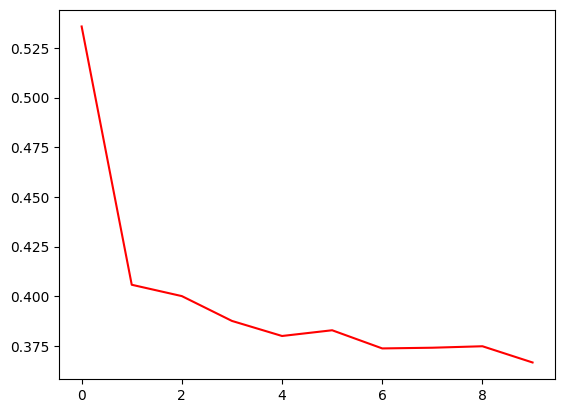

Epoch 1/10
290/290 [==============================] - 1s 2ms/step - loss: 0.4721 - accuracy: 0.7726
Epoch 2/10
290/290 [==============================] - 1s 2ms/step - loss: 0.3975 - accuracy: 0.8155
Epoch 3/10
290/290 [==============================] - 1s 2ms/step - loss: 0.3852 - accuracy: 0.8229
Epoch 4/10
290/290 [==============================] - 1s 2ms/step - loss: 0.3910 - accuracy: 0.8188
Epoch 5/10
290/290 [==============================] - 1s 2ms/step - loss: 0.3779 - accuracy: 0.8266
Epoch 6/10
290/290 [==============================] - 1s 2ms/step - loss: 0.3731 - accuracy: 0.8280
Epoch 7/10
290/290 [==============================] - 1s 2ms/step - loss: 0.3683 - accuracy: 0.8313
Epoch 8/10
290/290 [==============================] - 1s 2ms/step - loss: 0.3721 - accuracy: 0.8301
Epoch 9/10
290/290 [==============================] - 1s 2ms/step - loss: 0.3644 - accuracy: 0.8344
Epoch 10/10
907/907 [==============================] - 2s 2ms/step - loss: 0.3506 - accuracy: 0.8403

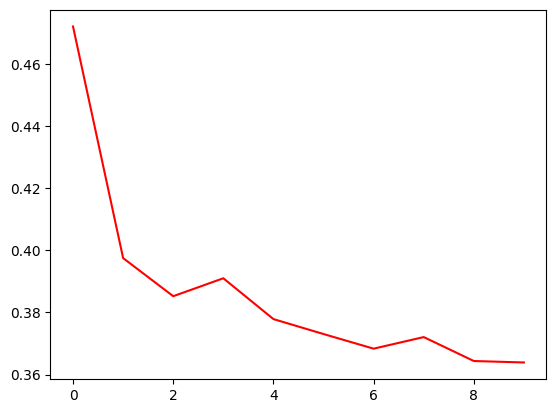

Epoch 1/10
290/290 [==============================] - 1s 2ms/step - loss: 0.4518 - accuracy: 0.7845
Epoch 2/10
290/290 [==============================] - 1s 2ms/step - loss: 0.4008 - accuracy: 0.8138
Epoch 3/10
290/290 [==============================] - 1s 2ms/step - loss: 0.3930 - accuracy: 0.8163
Epoch 4/10
290/290 [==============================] - 1s 2ms/step - loss: 0.3850 - accuracy: 0.8216
Epoch 5/10
290/290 [==============================] - 1s 2ms/step - loss: 0.3803 - accuracy: 0.8245
Epoch 6/10
290/290 [==============================] - 1s 2ms/step - loss: 0.3772 - accuracy: 0.8259
Epoch 7/10
290/290 [==============================] - 1s 2ms/step - loss: 0.3739 - accuracy: 0.8273
Epoch 8/10
290/290 [==============================] - 1s 2ms/step - loss: 0.3705 - accuracy: 0.8290
Epoch 9/10
290/290 [==============================] - 1s 2ms/step - loss: 0.3699 - accuracy: 0.8307
Epoch 10/10
907/907 [==============================] - 2s 2ms/step - loss: 0.3620 - accuracy: 0.8305

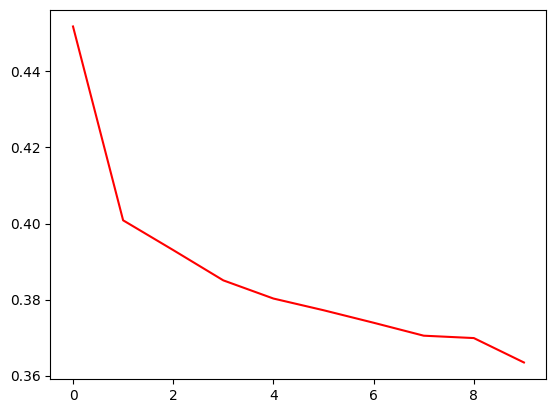

Epoch 1/10
290/290 [==============================] - 1s 3ms/step - loss: 0.4652 - accuracy: 0.7740
Epoch 2/10
290/290 [==============================] - 1s 3ms/step - loss: 0.4041 - accuracy: 0.8138
Epoch 3/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3942 - accuracy: 0.8183
Epoch 4/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3907 - accuracy: 0.8211
Epoch 5/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3804 - accuracy: 0.8234
Epoch 6/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3826 - accuracy: 0.8245
Epoch 7/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3773 - accuracy: 0.8268
Epoch 8/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3724 - accuracy: 0.8310
Epoch 9/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3673 - accuracy: 0.8326
Epoch 10/10
907/907 [==============================] - 2s 2ms/step - loss: 0.3789 - accuracy: 0.8231

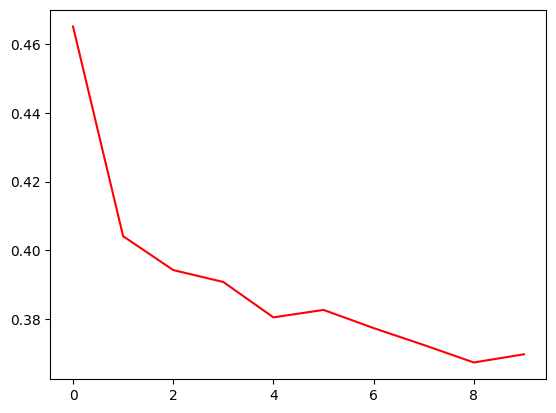

Epoch 1/10
290/290 [==============================] - 1s 3ms/step - loss: 0.4685 - accuracy: 0.7710
Epoch 2/10
290/290 [==============================] - 1s 3ms/step - loss: 0.4039 - accuracy: 0.8136
Epoch 3/10
290/290 [==============================] - 1s 3ms/step - loss: 0.4013 - accuracy: 0.8160
Epoch 4/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3876 - accuracy: 0.8199
Epoch 5/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3838 - accuracy: 0.8229
Epoch 6/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3752 - accuracy: 0.8276
Epoch 7/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3760 - accuracy: 0.8255
Epoch 8/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3708 - accuracy: 0.8305
Epoch 9/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3743 - accuracy: 0.8300
Epoch 10/10
907/907 [==============================] - 2s 2ms/step - loss: 0.3589 - accuracy: 0.8373

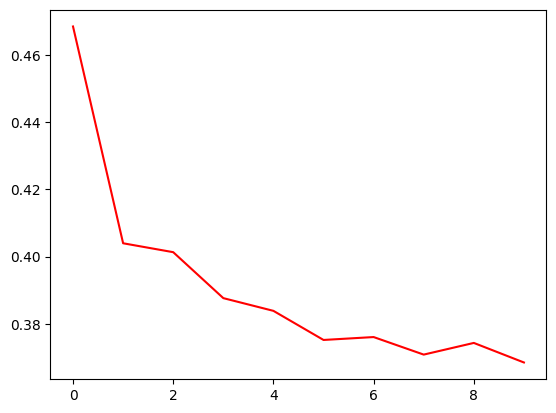

Epoch 1/10
290/290 [==============================] - 2s 3ms/step - loss: 0.4694 - accuracy: 0.7710
Epoch 2/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3997 - accuracy: 0.8177
Epoch 3/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3951 - accuracy: 0.8167
Epoch 4/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3903 - accuracy: 0.8190
Epoch 5/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3863 - accuracy: 0.8225
Epoch 6/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3837 - accuracy: 0.8233
Epoch 7/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3824 - accuracy: 0.8252
Epoch 8/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3765 - accuracy: 0.8283
Epoch 9/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3751 - accuracy: 0.8288
Epoch 10/10
907/907 [==============================] - 2s 2ms/step - loss: 0.3602 - accuracy: 0.8345

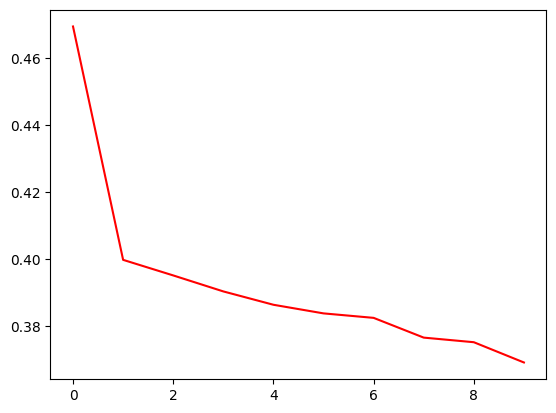

Epoch 1/10
290/290 [==============================] - 2s 3ms/step - loss: 0.4715 - accuracy: 0.7651
Epoch 2/10
290/290 [==============================] - 1s 3ms/step - loss: 0.4051 - accuracy: 0.8133
Epoch 3/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3939 - accuracy: 0.8188
Epoch 4/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3924 - accuracy: 0.8196
Epoch 5/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3821 - accuracy: 0.8238
Epoch 6/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3802 - accuracy: 0.8254
Epoch 7/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3799 - accuracy: 0.8267
Epoch 8/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3802 - accuracy: 0.8243
Epoch 9/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3698 - accuracy: 0.8303
Epoch 10/10
907/907 [==============================] - 2s 2ms/step - loss: 0.3564 - accuracy: 0.8358

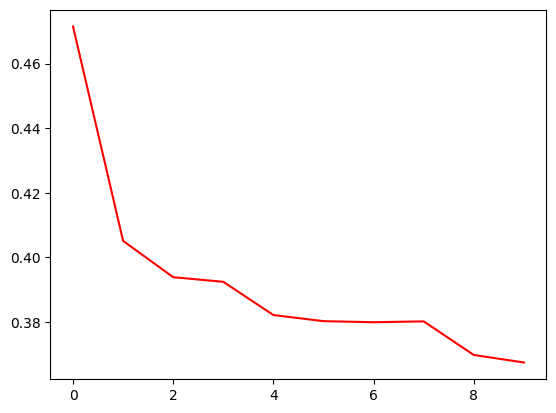

Epoch 1/10
290/290 [==============================] - 2s 3ms/step - loss: 0.4628 - accuracy: 0.7746
Epoch 2/10
290/290 [==============================] - 1s 3ms/step - loss: 0.4027 - accuracy: 0.8169
Epoch 3/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3971 - accuracy: 0.8191
Epoch 4/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3893 - accuracy: 0.8202
Epoch 5/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3872 - accuracy: 0.8243
Epoch 6/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3876 - accuracy: 0.8228
Epoch 7/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3744 - accuracy: 0.8286
Epoch 8/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3760 - accuracy: 0.8285
Epoch 9/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3767 - accuracy: 0.8258
Epoch 10/10
907/907 [==============================] - 2s 2ms/step - loss: 0.3615 - accuracy: 0.8358

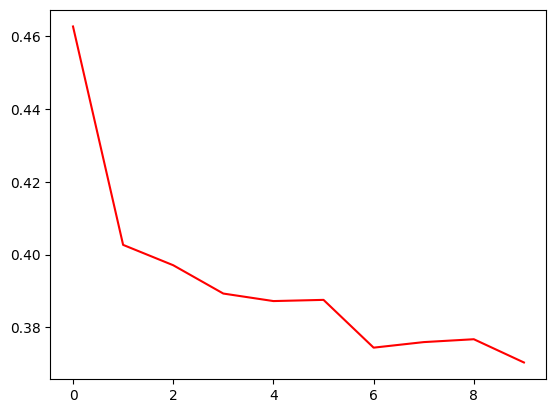

Epoch 1/10
290/290 [==============================] - 2s 3ms/step - loss: 0.4668 - accuracy: 0.7670
Epoch 2/10
290/290 [==============================] - 1s 3ms/step - loss: 0.4054 - accuracy: 0.8153
Epoch 3/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3938 - accuracy: 0.8177
Epoch 4/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3919 - accuracy: 0.8194
Epoch 5/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3841 - accuracy: 0.8222
Epoch 6/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3811 - accuracy: 0.8248
Epoch 7/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3786 - accuracy: 0.8262
Epoch 8/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3775 - accuracy: 0.8271
Epoch 9/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3709 - accuracy: 0.8294
Epoch 10/10
907/907 [==============================] - 2s 2ms/step - loss: 0.3607 - accuracy: 0.8326

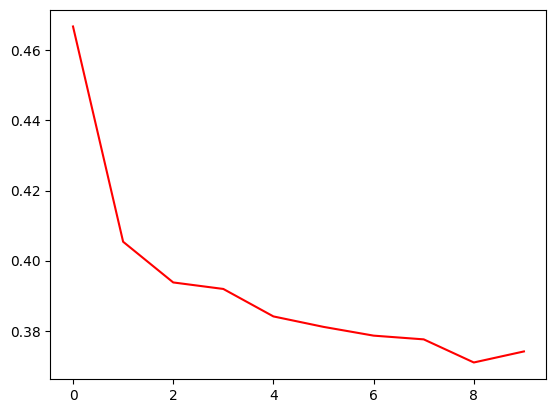

Epoch 1/10
290/290 [==============================] - 2s 3ms/step - loss: 0.4719 - accuracy: 0.7655
Epoch 2/10
290/290 [==============================] - 1s 3ms/step - loss: 0.4150 - accuracy: 0.8081
Epoch 3/10
290/290 [==============================] - 1s 3ms/step - loss: 0.4027 - accuracy: 0.8152
Epoch 4/10
290/290 [==============================] - 1s 3ms/step - loss: 0.4079 - accuracy: 0.8064
Epoch 5/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3912 - accuracy: 0.8182
Epoch 6/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3952 - accuracy: 0.8191
Epoch 7/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3866 - accuracy: 0.8226
Epoch 8/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3784 - accuracy: 0.8251
Epoch 9/10
290/290 [==============================] - 1s 3ms/step - loss: 0.3828 - accuracy: 0.8240
Epoch 10/10
907/907 [==============================] - 2s 2ms/step - loss: 0.3617 - accuracy: 0.8356

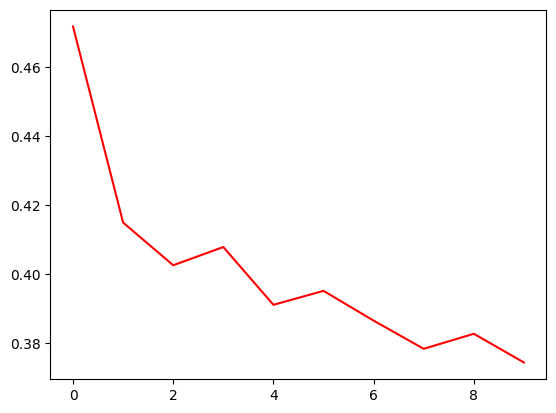

In [456]:
model_list = []
for i in range(10):
  hidden_units = 34     # how many neurons in the hidden layer
  activation = 'relu'   # activation function for hidden layer
  l2 = 0.01             # regularization - how much we penalize large parameter values
  learning_rate = 0.01  # how big our steps are in gradient descent
  epochs = 5            # how many epochs to train for
  batch_size = 100       # how many samples to use for each gradient descent update

  # create a sequential model
  model = models.Sequential()

  for j in range(i+1):
    # add the hidden layer
    model.add(layers.Dense(input_dim=34,
                           units=hidden_units, 
                           activation=activation))

  # add the output layer
  model.add(layers.Dense(input_dim=hidden_units,
                         units=1,
                         activation='sigmoid'))

  # define our loss function and optimizer
  model.compile(loss='binary_crossentropy',
                # Adam is a kind of gradient descent
                optimizer=optimizers.Adam(learning_rate=learning_rate),
                metrics=['accuracy'])

  # train the parameters
  history = model.fit(new_X_train_OS, new_y_train_OS, epochs=10, batch_size=batch_size)

  train_acc = model.evaluate(new_X_train_OS, new_y_train_OS, batch_size=32)[1]
  print('Training accuracy: %s' % train_acc)
  

  model_list.append((train_acc, model))
  losses = history.history['loss']
  plt.plot(range(len(losses)), losses, 'r')
  plt.show()

In [458]:
model = max(model_list)
train_acc = model[1].evaluate(new_X_train_OS, new_y_train_OS, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
ffnn_test_pred = model[1].predict(new_X_train_OS)

for i in range(len(ffnn_test_pred)): 
  if ffnn_test_pred[i] > 0.50:
    ffnn_test_pred[i] = 1
  else:
    ffnn_test_pred[i] = 0

cr = classification_report(ffnn_test_pred, new_y_train_OS)
print(f'{ffnn_test_pred}\n\n{cr}')

val_acc = model[1].evaluate(new_X_val, y_val_processed, batch_size=32)[1]
print('Testing accuracy: %s' % val_acc)
ffnn_test_pred = model[1].predict(new_X_val)

for i in range(len(ffnn_test_pred)): 
  if ffnn_test_pred[i] > 0.50:
    ffnn_test_pred[i] = 1
  else:
    ffnn_test_pred[i] = 0

cr = classification_report(ffnn_test_pred, y_val_processed)
print(f'{ffnn_test_pred}\n\n{cr}')

907/907 [==============================] - 2s 2ms/step - loss: 0.3506 - accuracy: 0.8403
Training accuracy: 0.8402883410453796
907/907 [==============================] - 1s 1ms/step
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]

              precision    recall  f1-score   support

         0.0       0.80      0.87      0.83     13239
         1.0       0.88      0.81      0.85     15757

    accuracy                           0.84     28996
   macro avg       0.84      0.84      0.84     28996
weighted avg       0.84      0.84      0.84     28996

151/151 [==============================] - 0s 2ms/step - loss: 0.3801 - accuracy: 0.8094
Testing accuracy: 0.8093659281730652
151/151 [==============================] - 0s 1ms/step
[[1.]
 [0.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]

              precision    recall  f1-score   support

         0.0       0.80      0.94      0.86      3073
         1.0       0.85      0.58      0.69      1753

    accuracy                           0.81      4826
   mac

In [459]:
new_X_train_OS['target'] = new_y_train_OS
new_X_val['target'] = y_val_processed
X_final_training = pd.concat([new_X_train_OS, new_X_val])

In [460]:
y_final_training = X_final_training['target']
X_final_training = X_final_training.drop('target', axis=1)

In [461]:
X_final_training.head()

,age,education-num,hours-per-week,education,sex,marital-status,native-country,race,workclass_Private,workclass_Without-pay,workclass_gov_job,workclass_selfemp,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,occupation_blue-collar,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,capital-gain,capital-loss
0,21.0,10.0,45.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,1.0,2.0,1.0,2.0,0.0,0.0
1,44.0,10.0,40.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,2.0,1.0,0.0,0.0,0.0
2,31.0,5.0,40.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,2.0,0.0,0.0
3,59.0,10.0,40.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,1.0,2.0,0.0,0.0
4,63.0,6.0,50.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,2.0,0.0,0.0


In [462]:
gs_lg.fit(X_final_training, y_final_training)
gs_clf.fit(X_final_training, y_final_training)
model[1].fit(X_final_training, y_final_training)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

1057/1057 [==============================] - 4s 3ms/step - loss: 0.3893 - accuracy: 0.8180


In [463]:
X_test = preprocess_w_names(X_test)
y_test = target_preprocess(y_test)

lg_test_pred = gs_lg.predict(X_test)
dt_test_pred = gs_clf.predict(X_test)

lg_metrics = classification_report(y_test, lg_test_pred)
lg_acc = accuracy_score(y_test, lg_test_pred)
lg_prec = precision_score(y_test, lg_test_pred)
lg_rec = recall_score(y_test, lg_test_pred)

print(f'Logistic Regression:\n:{lg_metrics}\nAccuracy:{lg_acc}\nPrecision:{lg_prec}\nRecall{lg_rec}\n')

dt_metrics = classification_report(y_test, dt_test_pred)
dt_acc = accuracy_score(y_test, dt_test_pred)
dt_prec = precision_score(y_test, dt_test_pred)
dt_rec = recall_score(y_test, dt_test_pred)

print(f'Decision Tree:\n:{dt_metrics}\nAccuracy:{dt_acc}\nPrecision:{dt_prec}\nRecall{dt_rec}\n')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Logistic Regression:
:              precision    recall  f1-score   support

           0       0.92      0.78      0.85      4531
           1       0.55      0.80      0.65      1502

    accuracy                           0.79      6033
   macro avg       0.74      0.79      0.75      6033
weighted avg       0.83      0.79      0.80      6033

Accuracy:0.7881650919940328
Precision:0.5513761467889908
Recall0.800266311584554

Decision Tree:
:              precision    recall  f1-score   support

           0       0.90      0.86      0.88      4531
           1       0.63      0.71      0.67      1502

    accuracy                           0.82      6033
   macro avg       0.76      0.78      0.77      6033
weighted avg       0.83      0.82      0.83      6033

Accuracy:0.8226421349245815
Precision:0.627208480565371
Recall0.7090545938748336



In [464]:
ffnn_test_pred = model[1].predict(X_test)

for i in range(len(ffnn_test_pred)): 
  if ffnn_test_pred[i] > 0.50:
    ffnn_test_pred[i] = 1
  else:
    ffnn_test_pred[i] = 0

cr = classification_report(ffnn_test_pred, y_test)
print(f'{ffnn_test_pred}\n\n{cr}')

189/189 [==============================] - 0s 1ms/step
[[1.]
 [0.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]

              precision    recall  f1-score   support

         0.0       0.75      0.94      0.83      3606
         1.0       0.86      0.53      0.65      2427

    accuracy                           0.78      6033
   macro avg       0.80      0.73      0.74      6033
weighted avg       0.79      0.78      0.76      6033

